In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
raw_data = pd.read_csv('software_tickets.csv')

In [38]:
raw_data['ict_components'].nunique()

91

In [16]:
sw_class = pd.read_csv('software_predictions.csv')
sw_class=sw_class[['ict_components','Predictions']]
sw_class.head()

,ict_components,Predictions
0,07 Operations Software Support,03 Control
1,03 Control,03 Control
2,07 Operations Software Support,07 Operations Software Support
3,03 Control,03 Control
4,12-01 Alarm System and Monitoring,12-01 Alarm System and Monitoring


In [17]:
sw_conf=sw_class[['ict_components','Predictions']]
sw_conf.head(20)

,ict_components,Predictions
0,07 Operations Software Support,03 Control
1,03 Control,03 Control
2,07 Operations Software Support,07 Operations Software Support
3,03 Control,03 Control
4,12-01 Alarm System and Monitoring,12-01 Alarm System and Monitoring
5,01 ACA Control 12-06 BulkData Handling,01 ACA Control 12-06 BulkData Handling
6,12-01 Alarm System and Monitoring,12-01 Alarm System and Monitoring
7,01 ACA Control 12-06 BulkData Handling,01 ACA Control 12-06 BulkData Handling
8,12-01 Alarm System and Monitoring,12-01 Alarm System and Monitoring
9,12-01 Alarm System and Monitoring,12-01 Alarm System and Monitoring


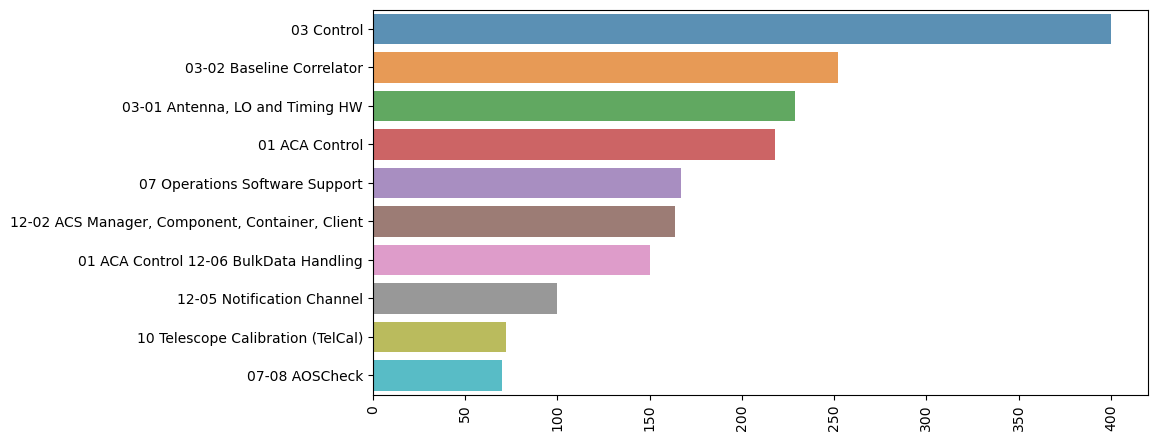

In [15]:
ict_count  = raw_data['ict_components'].value_counts()
ict_count = ict_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(y=ict_count.index, x=ict_count.values, alpha=0.8)
plt.xticks(rotation=90)
plt.show()

In [23]:
raw_data.ict_components.value_counts()[:10]

03 Control                                         400
03-02 Baseline Correlator                          252
03-01 Antenna, LO and Timing HW                    229
01 ACA Control                                     218
07 Operations Software Support                     167
12-02 ACS Manager, Component, Container, Client    164
01 ACA Control 12-06 BulkData Handling             150
12-05 Notification Channel                         100
10 Telescope Calibration (TelCal)                   72
07-08 AOSCheck                                      70
Name: ict_components, dtype: int64

In [32]:
#hw_conf['pred_rename']=hw_conf['predictions'].where()

p = ~(sw_conf.Predictions.isin(['03 Control','03-02 Baseline Correlator','03-01 Antenna, LO and Timing HW','01 ACA Control','07 Operations Software Support','12-02 ACS Manager, Component, Container, Client','01 ACA Control 12-06 BulkData Handling',
                                 '12-05 Notification Channel','10 Telescope Calibration (TelCal)','07-08 AOSCheck']))
sw_conf.loc[p, 'Predictions'] = 'Other SW'

h = ~(sw_conf.ict_components.isin(['03 Control','03-02 Baseline Correlator','03-01 Antenna, LO and Timing HW','01 ACA Control','07 Operations Software Support','12-02 ACS Manager, Component, Container, Client','01 ACA Control 12-06 BulkData Handling',
                                 '12-05 Notification Channel','10 Telescope Calibration (TelCal)','07-08 AOSCheck']))
sw_conf.loc[h, 'ict_components'] = 'Other SW'

In [33]:
sw_conf

,ict_components,Predictions
0,07 Operations Software Support,03 Control
1,03 Control,03 Control
2,07 Operations Software Support,07 Operations Software Support
3,03 Control,03 Control
4,Other SW,Other SW
...,...,...
2331,07 Operations Software Support,07 Operations Software Support
2332,Other SW,Other SW
2333,Other SW,Other SW
2334,07 Operations Software Support,07 Operations Software Support


# Confusion Matrix

In [34]:
y_true = sw_conf['ict_components'].to_list()
y_pred = sw_conf['Predictions'].to_list()


In [35]:
np.unique(y_pred)

array(['01 ACA Control', '01 ACA Control 12-06 BulkData Handling',
       '03 Control', '03-01 Antenna, LO and Timing HW',
       '03-02 Baseline Correlator', '07 Operations Software Support',
       '07-08 AOSCheck', '10 Telescope Calibration (TelCal)',
       '12-02 ACS Manager, Component, Container, Client',
       '12-05 Notification Channel', 'Other SW'], dtype='<U47')

In [36]:
np.unique(y_true)

array(['01 ACA Control', '01 ACA Control 12-06 BulkData Handling',
       '03 Control', '03-01 Antenna, LO and Timing HW',
       '03-02 Baseline Correlator', '07 Operations Software Support',
       '07-08 AOSCheck', '10 Telescope Calibration (TelCal)',
       '12-02 ACS Manager, Component, Container, Client',
       '12-05 Notification Channel', 'Other SW'], dtype='<U47')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

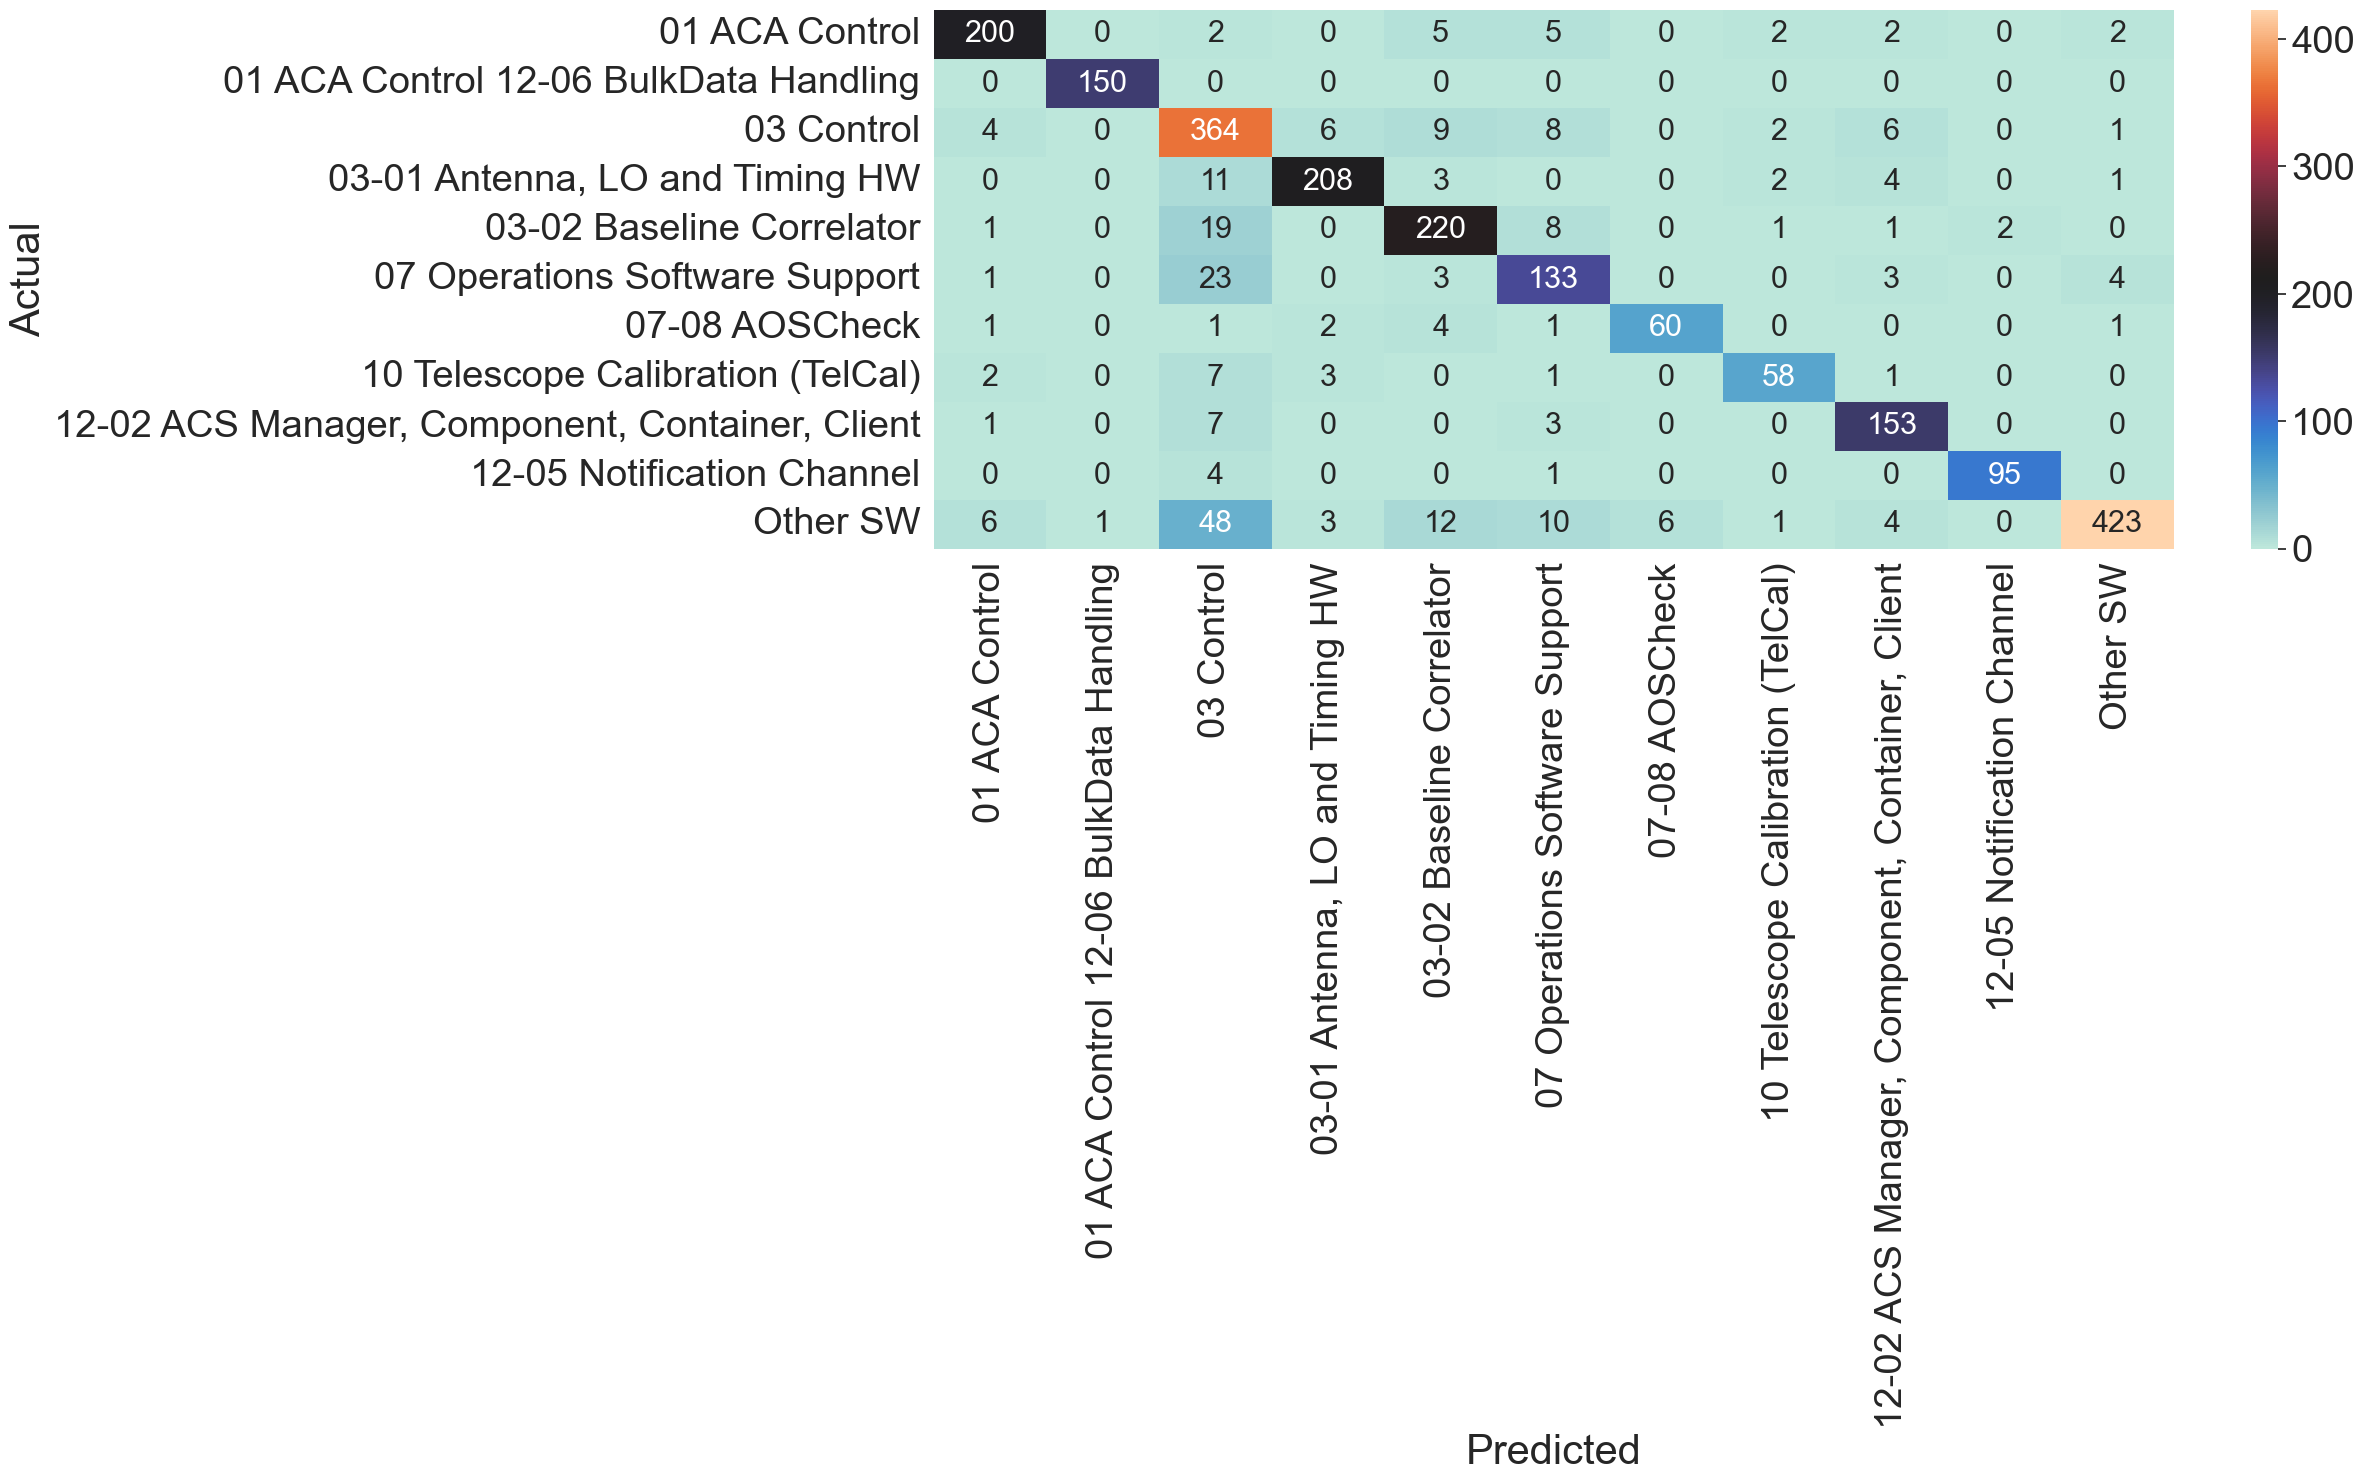

In [37]:
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,7))
sn.set(font_scale=2.5)#for label size
sn.heatmap(df_cm, cmap="icefire", annot=True,annot_kws={"size": 22}, fmt='g')# font size